# Proyecto Integrado I (Anáñisis de datos online Ice, tienda de vodeojuegos)

## 1. Carga de datos

### 1.1 Importar librerias.

In [1]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene
from sklearn.linear_model import LinearRegression

### 1.2 importar archivo de datos.

In [ ]:
url = 'https://raw.githubusercontent.com/Ramon-Bravo/datasets_publicos/refs/heads/main/games.csv'
df_games = pd.read_csv(url)

## 2. Preparacion de los datos

### 2.1 Corrección de nombre de las columnas

In [3]:
# Bucle for para formato de columnas del DF

nuevas_columnas = []

for columna in df_games.columns:
    no_espa = columna.strip()
    minusc = no_espa.lower()
    sust_esps = minusc.replace(" ", "_")
    nuevas_columnas.append(sust_esps)

df_games.columns = nuevas_columnas

In [4]:
# Comprobar cambio de nombres de columnas

df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2 Conversión de tipos de datos.

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Validar los datos que se encuentran en las columnas.

df_games.user_score.value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [7]:
# Sustitución de string "tbd" por valores nulos

df_games['user_score'] = df_games['user_score'].replace("tbd", "NaN")

df_games.user_score.value_counts()

user_score
NaN    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.9       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In [8]:
# Conversión de la columna user_score a tipo de dato float.

df_games['user_score'] = df_games['user_score'].astype('float')

df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [9]:
#Cambiando tipo de dato columna year_of_release a datetime

df_games['year_of_release'] = pd.to_datetime(df_games['year_of_release'], format= "%Y")

df_games.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
dtype: object

**Explicación cambio de tipos de datos**

*En la columna **user_score** decidí primero, sustituir los valores **tbd** a valores nulos y después cambiarlos al tipo float porque así será posible realizar cálculos estadísticos con ellos. Posteriormente, valoraré si es posible eliminar los valores nulos en esta columna.

*En la columna **year_of_release** realicé la conversión a tipo datetime para realizar el análisis de los datos posterior de acuerdo al año de lanzamiento de cada juego.

### 2.3 Valores ausentes.

#### 2.3.1 `name`

In [10]:
# Porcentaje de valores ausentes columna name

ausentes_name = df_games["name"].isna().sum()

porcentaje = round((ausentes_name / len(df_games)) * 100, 3)
print(f"Porcentaje de valores ausentes en la columna name: {porcentaje} %")

Porcentaje de valores ausentes en la columna name: 0.012 %


**Observaciones: tenemos solo dos valores ausentes en la presente columna, por lo anterior, una vez haya realizado la valoración de todas los valores ausentes, eliminaré estas dos filas debido a que solo representan menos del 1% de los datos.**

#### 2.3.2 `year_of_release`

In [11]:
ausentes_year = df_games["year_of_release"].isnull().sum()

porcentaje_y = round((ausentes_year / len(df_games)) * 100, 3)
print(f"Porcentaje de valores ausentes en la columna year_of_release: {porcentaje_y} %")

Porcentaje de valores ausentes en la columna year_of_release: 1.609 %


**Observaciones: Para el caso de la columna `year_of_release` contamos con 1.6% de valores ausentes, considero que este porcentaje no es muy grande, por lo que he decidido eliminar estas filas del dataframe**

#### 2.3.3 `genre`

In [12]:
ausentes_genre = df_games['genre'].isna().sum()
porcentaje_g = round((ausentes_genre / len(df_games)) * 100, 3)
print(f"Porcentaje de valores ausentes en la columna genre: {porcentaje_g} %")

Porcentaje de valores ausentes en la columna genre: 0.012 %


**Observaciones: De igual forma para esta columna, el total de valores ausentes representa menos del 1% de los datos totales, por lo que realizaré su eliminación**

**Posibles causas de los valores ausentes:**

Para las tres columnas anteriores `name`, `year_of_release` y `genre` creo que las causas por las que contengan valores ausentes se deba a errores de captura al momento de realizar la base de datos.

#### 2.3.4 `critic_score` , `user_score`

In [13]:
ausentes_c_s = df_games['critic_score'].isna().sum()
porcentaje_c_s = round((ausentes_c_s / len(df_games)) * 100, 3)
print(f"Porcentaje de valores ausentes en la columna critic_score: {porcentaje_c_s} %")

Porcentaje de valores ausentes en la columna critic_score: 51.319 %


In [14]:
ausentes_u_s = df_games['user_score'].isna().sum()
porcentaje_u_s = round((ausentes_u_s / len(df_games)) * 100, 3)
print(f"Porcentaje de valores ausentes en la columna user_score: {porcentaje_u_s} %")

Porcentaje de valores ausentes en la columna user_score: 54.592 %


**Posibles causas de los valores ausentes `critic_score` , `user_score`**

*La posible causa por la que contamos con valores ausentes en estas dos columnas se deba a que las calificaciones a los videojuegos iniciaron a finales de los años 1990's y principios de los 2000's por esto creo que es correcto que existan valores NAN; sin embargo, realizaré un Pequeño filtrado de datos para confirmar esta suposición.

In [15]:
# Validación suposición valores NaN columna `user_score`

nan_us_sc = df_games[df_games["user_score"].isna()][["year_of_release", "user_score"]].reset_index()
nan_us_sc['year_of_release'].value_counts().sort_index(ascending=True)

year_of_release
1980-01-01      9
1981-01-01     46
1982-01-01     36
1983-01-01     17
1984-01-01     14
1985-01-01     13
1986-01-01     21
1987-01-01     16
1988-01-01     14
1989-01-01     17
1990-01-01     16
1991-01-01     41
1992-01-01     42
1993-01-01     62
1994-01-01    120
1995-01-01    219
1996-01-01    255
1997-01-01    271
1998-01-01    348
1999-01-01    307
2000-01-01    243
2001-01-01    225
2002-01-01    365
2003-01-01    259
2004-01-01    273
2005-01-01    356
2006-01-01    454
2007-01-01    568
2008-01-01    766
2009-01-01    812
2010-01-01    788
2011-01-01    635
2012-01-01    314
2013-01-01    240
2014-01-01    252
2015-01-01    309
2016-01-01    240
Name: count, dtype: int64

In [16]:
# Validación suposición valores NaN columna `critic_score`

nan_critic_sc = df_games[df_games["critic_score"].isna()][["year_of_release", "critic_score"]].reset_index()
nan_critic_sc['year_of_release'].value_counts().sort_index(ascending=True)

year_of_release
1980-01-01      9
1981-01-01     46
1982-01-01     36
1983-01-01     17
1984-01-01     14
1985-01-01     13
1986-01-01     21
1987-01-01     16
1988-01-01     14
1989-01-01     17
1990-01-01     16
1991-01-01     41
1992-01-01     42
1993-01-01     62
1994-01-01    120
1995-01-01    219
1996-01-01    255
1997-01-01    272
1998-01-01    351
1999-01-01    299
2000-01-01    207
2001-01-01    156
2002-01-01    202
2003-01-01    190
2004-01-01    201
2005-01-01    284
2006-01-01    386
2007-01-01    505
2008-01-01    712
2009-01-01    775
2010-01-01    755
2011-01-01    636
2012-01-01    332
2013-01-01    271
2014-01-01    320
2015-01-01    381
2016-01-01    270
Name: count, dtype: int64

**Observaciones: De acuerdo a los filtros aplicados anteriormente encontré que la suposición descrita no es correcta; pero decidí no realizar reemplazos en los valores ausentes para estas dos columnas debido a que en caso de sustituir estos valores con ceros, por ejemplo, sería "injusto" en caso de usar como criterio cualquiera de estas dos columnas.**

#### 2.3.5 `rating`

In [17]:
ausentes_rating = df_games['rating'].isna().sum()
porcentaje_rating = round((ausentes_rating / len(df_games)) * 100, 3)
print(f"Porcentaje de valores ausentes en la columna user_score: {porcentaje_rating} %")

Porcentaje de valores ausentes en la columna user_score: 40.479 %


**Posibles causas de los valores ausentes `rating`**

* De acuerdo a una búsqueda en Internet, encontré que la clasificación ESRB (Entertainment Software Rating Board) de los videojuegos inició en 1994. Debido a esto algunos juegos anteriores a esta fecha, no hayan recibido una clasificación; Sin embargo, realizaré un filtrado de datos para confirmar esta suposición.

In [18]:
nan_rating = df_games[df_games["rating"].isna()][["year_of_release", "rating"]].reset_index()
nan_rating['year_of_release'].value_counts().sort_index(ascending=True)

year_of_release
1980-01-01      9
1981-01-01     46
1982-01-01     36
1983-01-01     17
1984-01-01     14
1985-01-01     13
1986-01-01     21
1987-01-01     16
1988-01-01     14
1989-01-01     17
1990-01-01     16
1991-01-01     41
1992-01-01     41
1993-01-01     62
1994-01-01    120
1995-01-01    219
1996-01-01    256
1997-01-01    270
1998-01-01    347
1999-01-01    296
2000-01-01    202
2001-01-01    143
2002-01-01    174
2003-01-01    162
2004-01-01    164
2005-01-01    233
2006-01-01    328
2007-01-01    376
2008-01-01    446
2009-01-01    415
2010-01-01    456
2011-01-01    433
2012-01-01    298
2013-01-01    228
2014-01-01    236
2015-01-01    291
2016-01-01    222
Name: count, dtype: int64

**Observaciones: para el caso de la columna `rating`, se concluye que la suposición anterior es incorrecta, debidop a que la mayoría de los datos ausentes para esta columna se encuentran de 1995 en adelante. POr otro comento que decidí no realizar cambios en los datos ausentes de esta columna.**

In [19]:
# Eliminación de datos ausentes en las columnas antes mencionadas. 

df_games_i = df_games.dropna(subset=['name', 'genre'])
df_games_ii = df_games_i.dropna(subset=['year_of_release'])

df_games_ii.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


### 2.4 Ventas totales. 

In [20]:
df_games_ii["total_sales"] = df_games_ii["na_sales"] + df_games_ii["eu_sales"] + df_games_ii["jp_sales"] + df_games_ii["other_sales"]

df_games_ii.head()

C:\Users\packe\AppData\Local\Temp\ipykernel_31764\3877734352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_ii["total_sales"] = df_games_ii["na_sales"] + df_games_ii["eu_sales"] + df_games_ii["jp_sales"] + df_games_ii["other_sales"]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## 3. Análisis de los datos.

### 3.1 Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [21]:
grouped_year = df_games_ii.groupby(['year_of_release'])
conteo_juegos_anio = grouped_year['name'].count().reset_index()

conteo_juegos_anio

,year_of_release,name
0,1980-01-01,9
1,1981-01-01,46
2,1982-01-01,36
3,1983-01-01,17
4,1984-01-01,14
5,1985-01-01,14
6,1986-01-01,21
7,1987-01-01,16
8,1988-01-01,15
9,1989-01-01,17


**¿Son significativos los datos de cada período?**

Observando el numero de lanzamientos de juegos por año, mi opinión es que sí, los datos son significativos para cada periodo, ya que es notorio que con el pasar del tiempo la insdustria de los videojuegos presenta un crecimiento constante hasta el año 2012, y hasta el 2016, periodo en el cual, es visible un decrecimiento en lo que respecta la cantidad de juegos lanzados.

### 3.2 Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

**Para esta parte del proyecto decidí realizar una división de las diferentes plataformas mas importantes y clasificarlas por su respectiva generación, esto para analizar las ventas por plataforma y presentar la distribución por año.**

In [22]:
#Agregando columna de fabricante

def manufacturer(platform):
    if platform in ['XB', 'X360', 'XOne']:
        return 'Microsoft'
    elif platform in ['NES', 'SNES', 'GB', 'N64', 'GBA', 'GC', 'DS', 'Wii', '3DS', 'WiiU']:
        return 'Nintento'
    elif platform in ['SCD', 'GEN', 'GG', 'SAT', 'DC']:
        return 'Sega'
    elif platform in ['PS', 'PS2', 'PS3', 'PSP', 'PSV', 'PS4']:
        return 'Sony'
    else:
        return 'Otros'
    
df_games_ii['manufacturer'] = df_games_ii['platform'].apply(manufacturer)

df_games_ii.sample(10)

C:\Users\packe\AppData\Local\Temp\ipykernel_31764\3122392530.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_ii['manufacturer'] = df_games_ii['platform'].apply(manufacturer)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,manufacturer
6782,Gallop Racer (JP),PS,1996-01-01,Sports,0.04,0.03,0.16,0.02,NaN,NaN,NaN,0.25,Sony
6236,Shin Megami Tensei: Strange Journey,DS,2009-01-01,Role-Playing,0.13,0.00,0.14,0.01,80.0,8.7,M,0.28,Nintento
15212,Princess Saver! Eternal Love for My Lady,PS2,2010-01-01,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02,Sony
3008,Star Wars: Republic Commando,XB,2005-01-01,Shooter,0.48,0.17,0.00,0.02,78.0,8.9,T,0.67,Microsoft
1976,The Simpsons: Road Rage,XB,2001-01-01,Racing,0.78,0.26,0.00,0.01,61.0,8.3,T,1.05,Microsoft
8534,DS Rakubiki Jiten,DS,2005-01-01,Misc,0.00,0.00,0.16,0.00,NaN,NaN,NaN,0.16,Nintento
11150,The Suffering: Ties That Bind,XB,2005-01-01,Action,0.07,0.02,0.00,0.00,76.0,9.1,M,0.09,Microsoft
14492,Guilty Gear XX Accent Core Plus,Wii,2009-01-01,Fighting,0.01,0.02,0.00,0.00,76.0,7.3,T,0.03,Nintento
1228,Resident Evil: The Umbrella Chronicles,Wii,2007-01-01,Action,0.67,0.43,0.29,0.14,75.0,7.6,M,1.53,Nintento
5700,MLB 07: The Show,PS3,2007-01-01,Sports,0.29,0.00,0.00,0.02,77.0,7.5,E,0.31,Sony


In [23]:
#Agregando columna de generación de plataforma

def generation(platform): 
    if platform in ['NES', 'SNES', '2600']:
        return '2G'
    elif platform in ['GB', 'TG16', 'NG', 'SCD', 'GEN', 'GG']:
        return '4G'
    elif platform in ['N64', 'PCFX', '3DO', 'SAT', 'PS']:
        return '5G'
    elif platform in ['XB', 'GBA', 'GC', 'WS', 'DC', 'PS2']:
        return '6G'
    elif platform in ['X360', 'DS', 'Wii', 'PS3', 'PSP']:
        return '7G'
    elif platform in ['XOne', '3DS', 'WiiU', 'PSV', 'PS4']:
        return '8G'
    else:
        return '3G'
    
df_games_ii['generation'] = df_games_ii['platform'].apply(generation)

df_games_ii.sample(10)

C:\Users\packe\AppData\Local\Temp\ipykernel_31764\3926757305.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_ii['generation'] = df_games_ii['platform'].apply(generation)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,manufacturer,generation
5845,Puyo Puyo 7,DS,2009-01-01,Puzzle,0.00,0.00,0.30,0.00,NaN,NaN,NaN,0.30,Nintento,7G
16304,Freekstyle,GBA,2003-01-01,Racing,0.01,0.00,0.00,0.00,65.0,NaN,E,0.01,Nintento,6G
2595,Dance Dance Revolution SuperNOVA 2,PS2,2007-01-01,Simulation,0.64,0.03,0.02,0.10,70.0,NaN,E10+,0.79,Sony,6G
1289,Tom Clancy's Splinter Cell: Pandora Tomorrow,XB,2004-01-01,Action,0.82,0.59,0.00,0.07,93.0,8.6,T,1.48,Microsoft,6G
9922,Samurai Warriors 4-II,PS4,2015-01-01,Action,0.03,0.02,0.06,0.01,73.0,7.3,T,0.12,Sony,8G
5327,Jikkyou Powerful Pro Yakyuu 7,PS2,2000-01-01,Sports,0.00,0.00,0.35,0.00,NaN,NaN,NaN,0.35,Sony,6G
6888,Star Trek: The Game,PS3,2013-01-01,Action,0.10,0.10,0.00,0.04,NaN,NaN,NaN,0.24,Sony,7G
3391,Rock Band 2,PS2,2008-01-01,Misc,0.29,0.23,0.00,0.08,NaN,8.0,T,0.60,Sony,6G
4172,Commando,2600,1987-01-01,Action,0.44,0.02,0.00,0.00,NaN,NaN,NaN,0.46,Otros,2G
1833,Crackdown 2,X360,2010-01-01,Shooter,0.63,0.36,0.02,0.10,70.0,6.0,M,1.11,Microsoft,7G


In [24]:
# Agregando columna año

df_games_ii['year'] = df_games_ii['year_of_release'].dt.year

df_games_ii.dtypes

C:\Users\packe\AppData\Local\Temp\ipykernel_31764\2763415538.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games_ii['year'] = df_games_ii['year_of_release'].dt.year


name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
total_sales               float64
manufacturer               object
generation                 object
year                        int32
dtype: object

In [25]:
# Buscando plataformas con mayores ventas

pivot_table = df_games_ii.pivot_table(
    index='platform',
    values='total_sales',
    aggfunc='sum'
)

pivot_table.sort_values(by='total_sales',ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [26]:
df_games_ii.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,manufacturer,generation,year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Nintento,7G,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Nintento,2G,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Nintento,7G,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Nintento,7G,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Nintento,4G,1996


In [27]:
# Agrupando Dataframe para creacion de distribución

mayores_ventas_gpd = df_games_ii.groupby(['platform', 'year'])
mayores_ventas = mayores_ventas_gpd['total_sales'].sum().reset_index()

mayores_ventas.sort_values(by='year', ascending=True).head(20)

,platform,year,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
77,NES,1983,10.96
4,2600,1984,0.27
78,NES,1984,50.08
5,2600,1985,0.45
93,PC,1985,0.04
79,NES,1985,53.44


#### 3.2.1 Dataframes plataformas con mayores ventas 5 generacion

In [28]:
tsales_ps = mayores_ventas[mayores_ventas['platform'] == "PS"].reset_index()

tsales_ps

,index,platform,year,total_sales
0,120,PS,1994,6.03
1,121,PS,1995,35.96
2,122,PS,1996,94.70
3,123,PS,1997,136.17
4,124,PS,1998,169.49
5,125,PS,1999,144.53
6,126,PS,2000,96.37
7,127,PS,2001,35.59
8,128,PS,2002,6.67
9,129,PS,2003,2.07


In [29]:
tsales_n64 = mayores_ventas[mayores_ventas['platform'] == "N64"].reset_index()

tsales_n64

,index,platform,year,total_sales
0,70,N64,1996,34.10
1,71,N64,1997,39.50
2,72,N64,1998,49.24
3,73,N64,1999,57.87
4,74,N64,2000,33.97
5,75,N64,2001,3.25
6,76,N64,2002,0.08


In [30]:
tsales_ss = mayores_ventas[mayores_ventas['platform'] == "SAT"].reset_index()

tsales_ss

,index,platform,year,total_sales
0,175,SAT,1994,3.65
1,176,SAT,1995,11.57
2,177,SAT,1996,7.69
3,178,SAT,1997,6.77
4,179,SAT,1998,3.82
5,180,SAT,1999,0.09


##### 3.2.1.1 Distribucion por plataforma 5 generacion

In [31]:
# Merge de df para grafica

gen_5_merge = tsales_ps.merge(tsales_n64, on='year', how='left', suffixes=['_PS', '_N64'])
gen_5_merge_i = gen_5_merge.merge(tsales_ss, on='year', how='left')

gen_5_merge_i

,index_PS,platform_PS,year,total_sales_PS,index_N64,platform_N64,total_sales_N64,index,platform,total_sales
0,120,PS,1994,6.03,NaN,NaN,NaN,175.0,SAT,3.65
1,121,PS,1995,35.96,NaN,NaN,NaN,176.0,SAT,11.57
2,122,PS,1996,94.70,70.0,N64,34.10,177.0,SAT,7.69
3,123,PS,1997,136.17,71.0,N64,39.50,178.0,SAT,6.77
4,124,PS,1998,169.49,72.0,N64,49.24,179.0,SAT,3.82
5,125,PS,1999,144.53,73.0,N64,57.87,180.0,SAT,0.09
6,126,PS,2000,96.37,74.0,N64,33.97,NaN,NaN,NaN
7,127,PS,2001,35.59,75.0,N64,3.25,NaN,NaN,NaN
8,128,PS,2002,6.67,76.0,N64,0.08,NaN,NaN,NaN
9,129,PS,2003,2.07,NaN,NaN,NaN,NaN,NaN,NaN


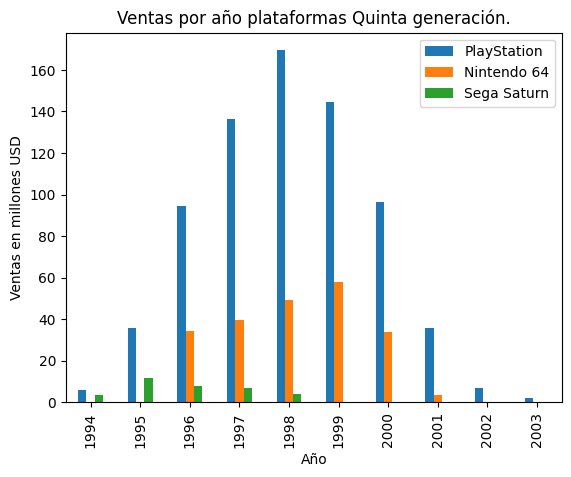

In [32]:
# Distribucion por año plataformas 5 generacion

gen_5_merge_i.plot(kind='bar', title='Ventas por año plataformas Quinta generación.', x='year', y=['total_sales_PS', 'total_sales_N64', 'total_sales'], 
                   ylabel='Ventas en millones USD', xlabel='Año')

plt.legend(['PlayStation', 'Nintendo 64', 'Sega Saturn'])
plt.show()

#### 3.2.2 Dataframes plataformas con mayores ventas 6 generacion

In [33]:
tsales_ps2 = mayores_ventas[mayores_ventas['platform'] == "PS2"].reset_index()

tsales_xb = mayores_ventas[mayores_ventas['platform'] == "XB"].reset_index()

tsales_gc = mayores_ventas[mayores_ventas['platform'] == "GC"].reset_index()

tsales_gba = mayores_ventas[mayores_ventas['platform'] == "GBA"].reset_index()



##### 3.2.2.1 Distribucion por plataforma 6 generacion

In [34]:
# Merge dataframes 

gen_6_merge = tsales_ps2.merge(tsales_xb, on='year', how='left', suffixes=['_PS2', '_XB'])
gen_6_merge_i = gen_6_merge.merge(tsales_gc, on='year', how='left')
gen_6_merge_ii = gen_6_merge_i.merge(tsales_gba, on='year', how='left', suffixes=['_GC', '_GBA'])

gen_6_merge_ii

,index_PS2,platform_PS2,year,total_sales_PS2,index_XB,platform_XB,total_sales_XB,index_GC,platform_GC,total_sales_GC,index_GBA,platform_GBA,total_sales_GBA
0,130,PS2,2000,39.17,225.0,XB,0.99,NaN,NaN,NaN,49.0,GBA,0.07
1,131,PS2,2001,166.43,226.0,XB,22.26,57.0,GC,26.34,50.0,GBA,61.53
2,132,PS2,2002,205.38,227.0,XB,48.01,58.0,GC,51.81,51.0,GBA,74.16
3,133,PS2,2003,184.31,228.0,XB,55.04,59.0,GC,50.61,52.0,GBA,56.67
4,134,PS2,2004,211.81,229.0,XB,65.42,60.0,GC,28.82,53.0,GBA,77.91
5,135,PS2,2005,160.66,230.0,XB,49.08,61.0,GC,27.62,54.0,GBA,33.86
6,136,PS2,2006,103.42,231.0,XB,10.04,62.0,GC,11.26,55.0,GBA,5.28
7,137,PS2,2007,75.99,232.0,XB,0.55,63.0,GC,0.27,56.0,GBA,3.40
8,138,PS2,2008,53.90,233.0,XB,0.18,NaN,NaN,NaN,NaN,NaN,NaN
9,139,PS2,2009,26.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


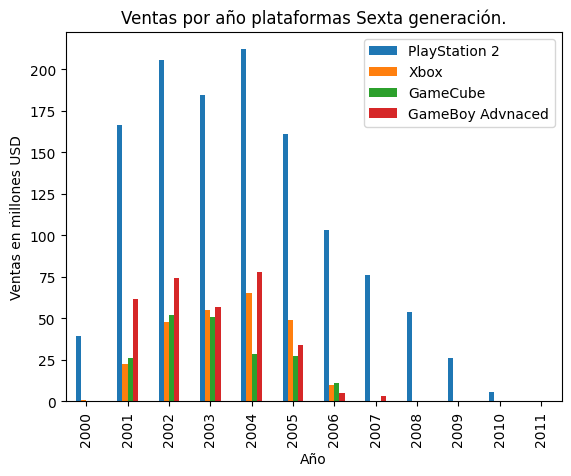

In [35]:
# Distribucion por año plataformas 6 generacion

gen_6_merge_ii.plot(kind='bar', title='Ventas por año plataformas Sexta generación.', x='year', y=['total_sales_PS2', 'total_sales_XB', 'total_sales_GC', 'total_sales_GBA'], 
                   ylabel='Ventas en millones USD', xlabel='Año')

plt.legend(['PlayStation 2', 'Xbox', 'GameCube', 'GameBoy Advnaced'])
plt.show()

#### 3.2.3 Dataframes plataformas con mayores ventas 7 generacion

In [36]:
tsales_ps3 = mayores_ventas[mayores_ventas['platform'] == "PS3"].reset_index()

tsales_xb360 = mayores_ventas[mayores_ventas['platform'] == "X360"].reset_index()

tsales_wii = mayores_ventas[mayores_ventas['platform'] == "Wii"].reset_index()

tsales_ds = mayores_ventas[mayores_ventas['platform'] == "DS"].reset_index()

##### 3.2.3.1 Distribucion por plataforma 7 generacion

In [37]:
# Merge dataframes 

gen_7_merge = tsales_ps3.merge(tsales_xb360, on='year', how='left', suffixes=['_PS3', '_X360'])
gen_7_merge_i = gen_7_merge.merge(tsales_wii, on='year', how='left')
gen_7_merge_ii = gen_7_merge_i.merge(tsales_ds, on='year', how='left', suffixes=['_Wii', '_DS'])

gen_7_merge_ii

,index_PS3,platform_PS3,year,total_sales_PS3,index_X360,platform_X360,total_sales_X360,index_Wii,platform_Wii,total_sales_Wii,index_DS,platform_DS,total_sales_DS
0,142,PS3,2006,20.96,214,X360,51.62,197,Wii,137.15,28.0,DS,119.81
1,143,PS3,2007,73.19,215,X360,95.41,198,Wii,152.77,29.0,DS,146.94
2,144,PS3,2008,118.52,216,X360,135.26,199,Wii,171.32,30.0,DS,145.31
3,145,PS3,2009,130.93,217,X360,120.29,200,Wii,206.97,31.0,DS,119.54
4,146,PS3,2010,142.17,218,X360,170.03,201,Wii,127.95,32.0,DS,85.02
5,147,PS3,2011,156.78,219,X360,143.84,202,Wii,59.65,33.0,DS,26.18
6,148,PS3,2012,107.36,220,X360,99.74,203,Wii,21.71,34.0,DS,11.01
7,149,PS3,2013,113.25,221,X360,88.58,204,Wii,8.59,35.0,DS,1.54
8,150,PS3,2014,47.76,222,X360,34.74,205,Wii,3.75,NaN,NaN,NaN
9,151,PS3,2015,16.82,223,X360,11.96,206,Wii,1.14,NaN,NaN,NaN


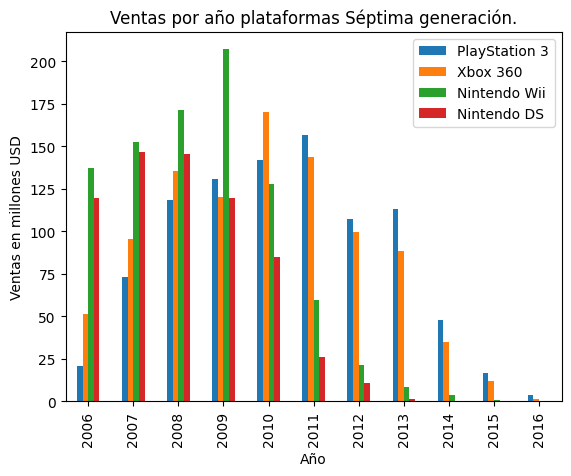

In [38]:
# Distribucion por año plataformas 6 generacion

gen_7_merge_ii.plot(kind='bar', title='Ventas por año plataformas Séptima generación.', x='year', y=['total_sales_PS3', 'total_sales_X360', 'total_sales_Wii', 'total_sales_DS'], 
                   ylabel='Ventas en millones USD', xlabel='Año')

plt.legend(['PlayStation 3', 'Xbox 360', 'Nintendo Wii', 'Nintendo DS'])
plt.show()

#### 3.2.4 Ciclo de vida de las consolas

In [39]:
# Ciclo de vida

plats = ['PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS', 'PS4', 'XOne', 'WiiU']

cdv_lineas = df_games_ii[df_games_ii['platform'].isin(plats)].groupby(['year', 'platform'])['total_sales'].sum().reset_index()

cdv_lineas.drop([0], inplace=True)

cdv_lineas.head()

,year,platform,total_sales
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17
5,1998,PS,169.49


<Axes: xlabel='year', ylabel='total_sales'>

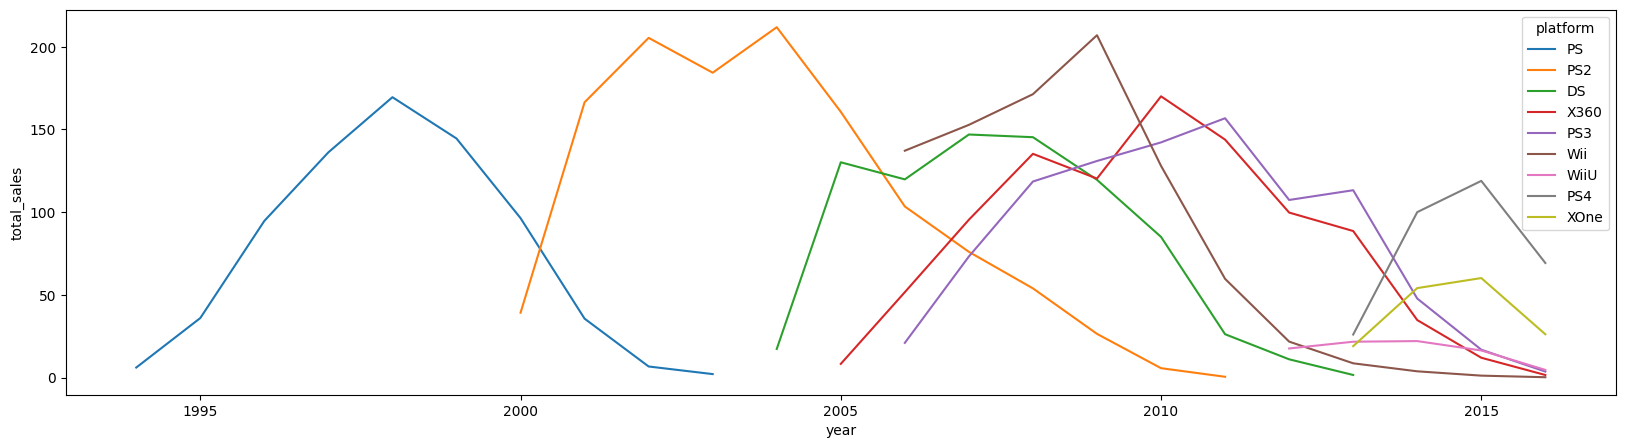

In [40]:
plt.figure(figsize=(20,5))

sns.lineplot(data=cdv_lineas, x='year', y='total_sales', hue='platform')

In [41]:
# Años de vida de las plataformas

c_l_v = df_games_ii[df_games_ii['platform'].isin(plats)].groupby('platform').agg(
    release_y = ('year', 'min'),
    end_y = ('year', 'max'))

In [42]:
c_l_v['life_cycle'] = c_l_v['end_y'] - c_l_v['release_y']

c_l_v.drop(['DS'], inplace=True)

In [43]:
c_l_v.sort_values(by='life_cycle', ascending=False)

,release_y,end_y,life_cycle
platform,,,
PS2,2000,2011,11
X360,2005,2016,11
Wii,2006,2016,10
PS3,2006,2016,10
PS,1994,2003,9
WiiU,2012,2016,4
PS4,2013,2016,3
XOne,2013,2016,3


#### 3.2.5 Conclusiones intermedias

**De acuerdo al análisis realizadfo y dando respuesta a la pregunta planteada (¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?) encontramos que las plataformas tardan en desaparecer aproximadamente entre 9 y 11 años, y las nuevas plataformas en aparecer 6  años aproximadamente, lo anterior debido a que en un inicio las nuevas plataformas no cuentan con ventas muy altas, por el contrario, "las que van de salida", no dejan de vender. Esto puede deberse a que cuando se lanzan nuevas consolas los precios pueden ser altos para muchas personas, pero con el pasar del tiempo estos precios disminuyen.**

### 3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

**Para esta parte del proyecto utilizaré mis datos para las plataformas de la octava generación para la construcción del modelo del 2017.**

In [44]:
mod_2017 = df_games_ii[(df_games_ii['year'] >= 2013) & (df_games_ii['generation'] >= '8G')].reset_index(drop=True)

mod_2017.sort_values(by='year', ascending=True).head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,manufacturer,generation,year
18,Tomodachi Life,3DS,2013-01-01,Simulation,0.97,2.11,1.9,0.24,NaN,NaN,NaN,5.22,Nintento,8G,2013


#### 3.3.1 Segmentación de datos para la construcción del modelo 2017 para las dos plataformas principales (XOne y PS4).

**Decidí segmentar de esta manera debido a que creo que será menos complejo construir el modelo para el año 2017. De igual forma, para las plataformas con mayores ventas.**

##### 3.3.1.1 Modelo predicción de ventas 2017 XOne

In [45]:
mod_2017_xone = mod_2017[mod_2017['platform'] == 'XOne'].groupby(['year'])['total_sales'].sum().reset_index()


mod_2017_xone

,year,total_sales
0,2013,18.96
1,2014,54.07
2,2015,60.14
3,2016,26.15


In [46]:
# Creación variables independientes y dependientes para la creación del modelo.

x_xone = mod_2017_xone[['year']]
y_xone = mod_2017_xone['total_sales']

modelo = LinearRegression()
modelo.fit(x_xone, y_xone)

xone_2017 = pd.DataFrame({'year': [2017]})
sales_2017_xone = modelo.predict(xone_2017)

f'Pronóstico de ventas XOne 2017: {round(sales_2017_xone[0], 2)}, milones USD.'

'Pronóstico de ventas XOne 2017: 46.74, milones USD.'

##### 3.3.1.2 Modelo predicción de ventas 2017 PS4

In [47]:
mod_2017_ps4 = mod_2017[mod_2017['platform'] == 'PS4'].groupby(['year'])['total_sales'].sum().reset_index()


mod_2017_ps4

,year,total_sales
0,2013,25.99
1,2014,100.00
2,2015,118.90
3,2016,69.25


In [48]:
# Creación variables independientes y dependientes para la creación del modelo.

x_ps4 = mod_2017_ps4[['year']]
y_ps4 = mod_2017_ps4['total_sales']

modelo = LinearRegression()
modelo.fit(x_ps4, y_ps4)

ps4_2017 = pd.DataFrame({'year': [2017]})
sales_2017_ps4 = modelo.predict(ps4_2017)

f'Pronóstico de ventas para PS4 en 2017: {round(sales_2017_ps4[0], 2)}, milones USD.'

'Pronóstico de ventas para PS4 en 2017: 115.71, milones USD.'

#### 3.3.2 Observaciones pronóstico de ventas XOne y PS4 2017.

**De acuerdo a los modelos creados para pronosticar las ventas de las dos plataformas mencionadas, se observa que con el pasar de los años, a partir de su lanzamiento, existe un incremento en las ventas para ambas, sin embargo como se distingue en los df. Es importante mencionar que, debido a que no contamos con los datos completos del año 2016, ambas cifras de la predicción sean innexactas.**

### 3.4 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

**Para encontrar las plataformas líderes en vemntas, y responder a la pregunta sobre las que crecen en ventas y viceversa, y posteriormente hacer un pronóstico de las plataformas que cuentan con mayores ventas en el futuro.**

In [49]:
df_rent = df_games_ii[df_games_ii['platform'].isin(plats)].groupby(['year', 'platform', 'generation'])['total_sales'].sum().reset_index()

df_rent.drop([0], inplace=True)

In [50]:
rent_i = df_rent[(df_rent['generation'] == '7G') | (df_rent['generation'] == '8G')].reset_index(drop=True)

rent_i_7g = rent_i[rent_i['generation'] == '7G']

rent_i_8g = rent_i[(rent_i['generation'] == '8G') & (rent_i['year'] < 2016)]

#### 3.4.1 Plataformas que reducen su volúmen de ventas generación 7G.

**Como se puede ver en la siguiente gráfica, las plataformas cuyas ventas han decrecido son: la Xbox360, la PS3 y la Wii. También podemos ver que el ciclo de vida para el DS terminó 3 años antes en comparación con las otras tres consolas; sin embargo, es importante mencionar que su lanzamiento también fue primero.**

<Axes: xlabel='year', ylabel='total_sales'>

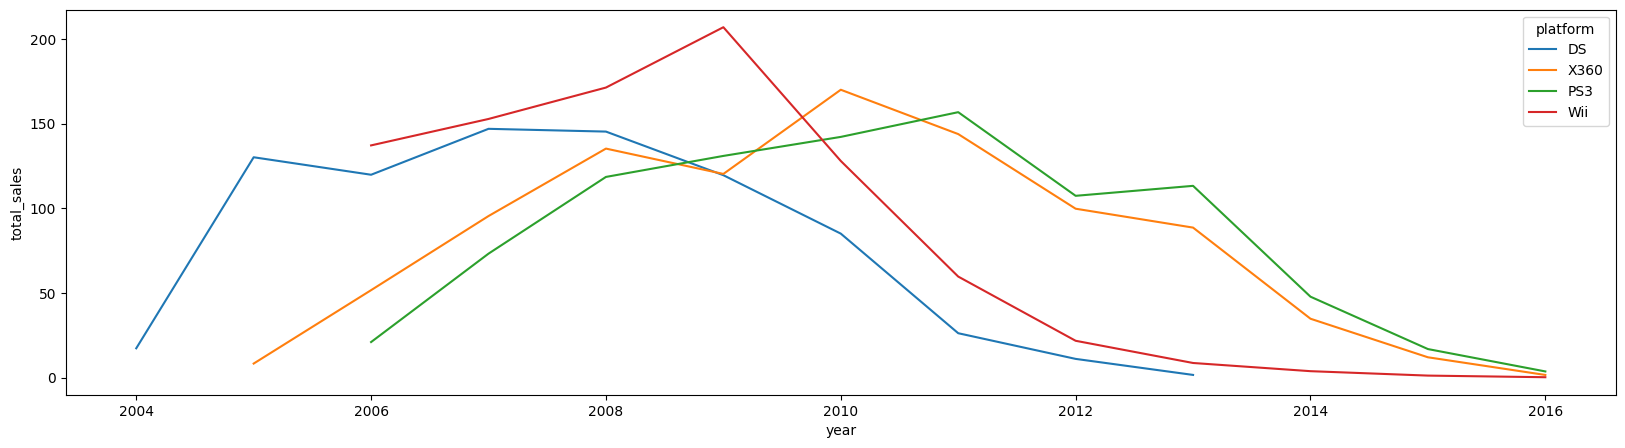

In [51]:
plt.figure(figsize=(20,5))

sns.lineplot(data=rent_i_7g, x='year', y='total_sales', hue='platform')

#### 3.4.2 Plataformas que incrementan su volúmen de ventas generación 8G.

**Nota: Para determinar las plataformas que son líderes consideré las ventas hasta el 2015 ya que considero que debido a que la data del 2016 está incompleta no nos ayuda a determinar esta cuestion.**

**Se puede observa en la imagen a continuación que las consolas líderes del mercado son la PS4 y la XOne.**

<Axes: xlabel='year', ylabel='total_sales'>

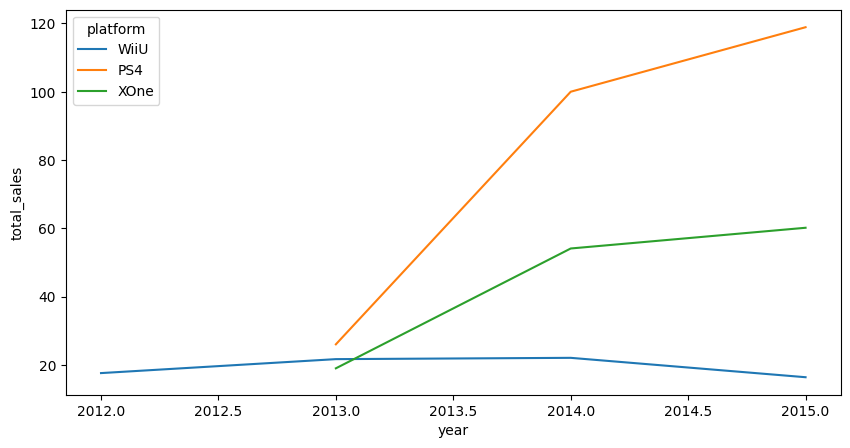

In [52]:
plt.figure(figsize=(10,5))

sns.lineplot(data=rent_i_8g, x='year', y='total_sales', hue='platform')

#### 3.4.3 Plataformas potenciamente rentables. 

**Con el objetivo de encontrar las plataformas que contarán con mayores ventas en el futuro, realizaré, también el pronóstico de ventas para la WiiU y tener un panorama amplio sobre el mercado.**

In [53]:
mod_2017_wiiu = df_games_ii[(df_games_ii['generation'] == '8G') & (df_games_ii['platform'] == 'WiiU')].groupby(['year'])['total_sales'].sum().reset_index()

mod_2017_wiiu

,year,total_sales
0,2012,17.56
1,2013,21.65
2,2014,22.03
3,2015,16.35
4,2016,4.60


In [54]:
# Creación variables independientes y dependientes para la creación del modelo.

x_wiiu = mod_2017_wiiu[['year']]
y_wiiu = mod_2017_wiiu['total_sales']

modelo = LinearRegression()
modelo.fit(x_wiiu, y_wiiu)

wiiu_2017 = pd.DataFrame({'year': [2017]})
sales_2017_wiiu = modelo.predict(wiiu_2017)

f'Pronóstico de ventas WiiU 2017: {round(sales_2017_wiiu[0], 2)}, milones USD.'

'Pronóstico de ventas WiiU 2017: 7.07, milones USD.'

In [55]:
# Agregando datos de pronósticos de ventas a los df's para graficar.

pred_2017_xone = {'year': [2017], 'total_sales': [46.74]}
pred_2017_ps4 = {'year': [2017], 'total_sales': [115.71]}
pred_2017_wiiu = {'year': [2017], 'total_sales': [7.07]}

df_2017_xone = pd.DataFrame(pred_2017_xone)
df_2017_ps4 = pd.DataFrame(pred_2017_ps4)
df_2017_wiiu = pd.DataFrame(pred_2017_wiiu)

conca_2017_xone = pd.concat([mod_2017_xone, df_2017_xone], ignore_index=True)
conca_2017_ps4 = pd.concat([mod_2017_ps4, df_2017_ps4], ignore_index=True)
conca_2017_wiiu = pd.concat([mod_2017_wiiu, df_2017_wiiu], ignore_index=True)

conca_2017_xone.index = ['XOne', 'XOne', 'XOne', 'XOne', 'XOne']
conca_2017_ps4.index = ['PS4', 'PS4', 'PS4', 'PS4', 'PS4']
conca_2017_wiiu.index = ['WiiU', 'WiiU', 'WiiU', 'WiiU', 'WiiU', 'WiiU']

In [56]:
juntos = conca_2017_xone.merge(conca_2017_ps4, on='year', how='left', suffixes=['_XOne', '_PS4'])
juntos_i = juntos.merge(conca_2017_wiiu, on='year', how='left')
juntos_i

,year,total_sales_XOne,total_sales_PS4,total_sales
0,2013,18.96,25.99,21.65
1,2014,54.07,100.00,22.03
2,2015,60.14,118.90,16.35
3,2016,26.15,69.25,4.60
4,2017,46.74,115.71,7.07


**Como se puede observar en la siguiente grafica la consola con mayor potencial de ventas para el 2017 es el PS4, seguido por el XOne; es importante mencionar que se ve una caida en la ventas de las tres consolas en 2016 debido a que la data de ese año no esta completa.**

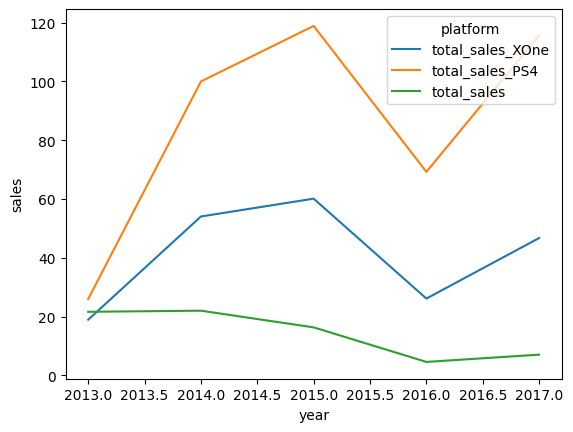

In [57]:
plat_pot_rent = juntos_i.melt(id_vars='year', value_vars=['total_sales_XOne', 'total_sales_PS4', 'total_sales'], var_name='platform', value_name='sales')

sns.lineplot(data=plat_pot_rent, x='year', y='sales', hue='platform')

plt.show()

### 3.5 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

#### 3.5.1 Diagrama de caja.

In [58]:
# Dataframe diagráma de caja

box_plat = df_games_ii[['platform', 'total_sales']]

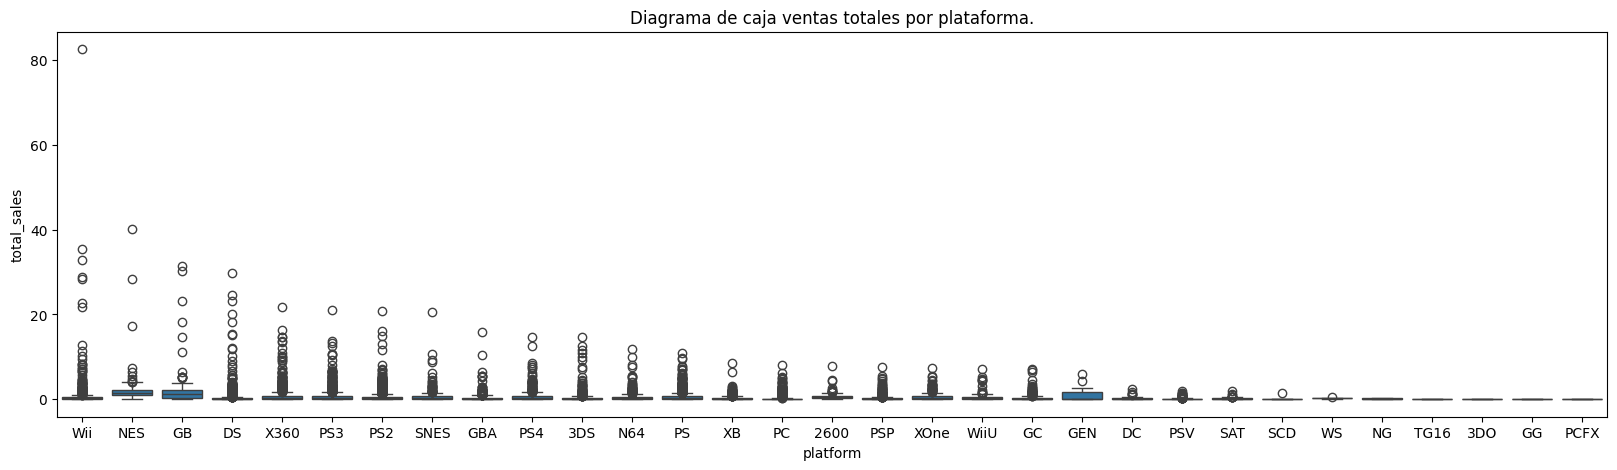

In [59]:
plt.figure(figsize=(20,5))

sns.boxplot(data=box_plat , x='platform', y='total_sales')

plt.title('Diagrama de caja ventas totales por plataforma.')

plt.show()

#### 3.5.2 Promedio de ventas por plataforma.

**Crearé una gráfica de barras para encontrar las ventas promedio en las plataformas.**

In [60]:
plat_sal_mean = df_games_ii.groupby('platform')['total_sales'].mean().reset_index()

<Figure size 5000x3000 with 0 Axes>

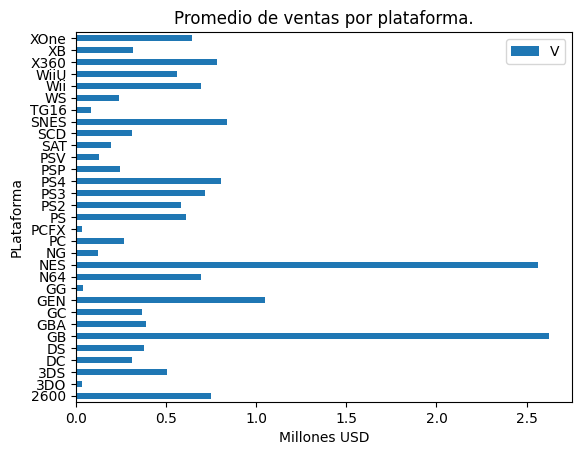

In [61]:
plt.figure(figsize=(50, 30))

graf_mean_sales = plat_sal_mean.plot(kind='barh', x='platform', y='total_sales')

plt.title('Promedio de ventas por plataforma.')
plt.xlabel('Millones USD')
plt.ylabel('PLataforma')
plt.legend('Ventas totales')
plt.show()

**De acuerdo a la gráfica de barras anterior, se puedo concluir que la diferencia de las ventas promedio por plataforma es estadísticamente significativa.**

### 3.6 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

**Plataforma seleccionada PS4**

#### 3.6.1 Correlacion entre las valoraciones de usuarios, críticos y las ventas totales.

In [62]:
# Creacion de correlacion para PS4 

df_ps4 = df_games_ii[df_games_ii['platform'] == 'PS4'].copy()


df_ps4['user_score'] = pd.to_numeric(df_ps4['user_score'], errors='coerce')
df_ps4['critic_score'] = pd.to_numeric(df_ps4['critic_score'], errors='coerce')

correl = df_ps4[['user_score', 'critic_score', 'total_sales']].corr()

correl


,user_score,critic_score,total_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
total_sales,-0.031957,0.406568,1.000000


#### 3.6.2 Gráfico de disperción `user_score` y las `total_sales`

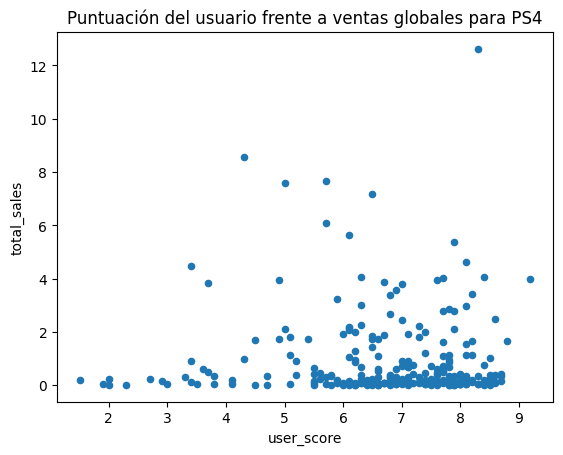

In [63]:
df_ps4.plot(kind='scatter', x='user_score', y='total_sales', title='Puntuación del usuario frente a ventas globales para PS4')

plt.show()

#### 3.6.3 Gráfico de disperción `critic_score` y las `total_sales`

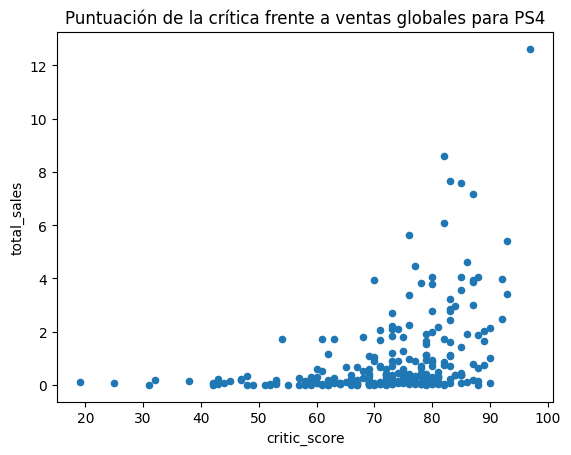

In [64]:
df_ps4.plot(kind='scatter', x='critic_score', y='total_sales', title='Puntuación de la crítica frente a ventas globales para PS4')

plt.show()

**En la informacion descrita anteriormente, es observable que la correlacion entre la puntuación de los usuarios y las ventas globales es de -0.03, esto indica una correlación negativa debil. Por otro lado, la correlacion entre la puntuación de los crítiocos y las ventas globales es de 0.4, lo que indica una correlación positiva moderada.**

### 3.7 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

#### 3.7.1 Dataframe para la comparación de un mismo juego en diferentes plataformas.

**Para esta parte del proyecto decidí comparar las ventas para el juego FIFA 17 en las diferentes plataformas.**

In [65]:
fifa_17 = df_games_ii[df_games_ii['name'] == 'FIFA 17']

fifa_17_i = fifa_17[['name', 'platform', 'total_sales']].sort_values(by='total_sales', ascending=False)

fifa_17_i

,name,platform,total_sales
94,FIFA 17,PS4,7.60
571,FIFA 17,XOne,2.65
2782,FIFA 17,PS3,0.73
5010,FIFA 17,X360,0.38
9955,FIFA 17,PC,0.12


#### 3.7.2 Grafico de barras para la visualizacion de un mismo juego en diferentes plataformas.

<Figure size 2000x500 with 0 Axes>

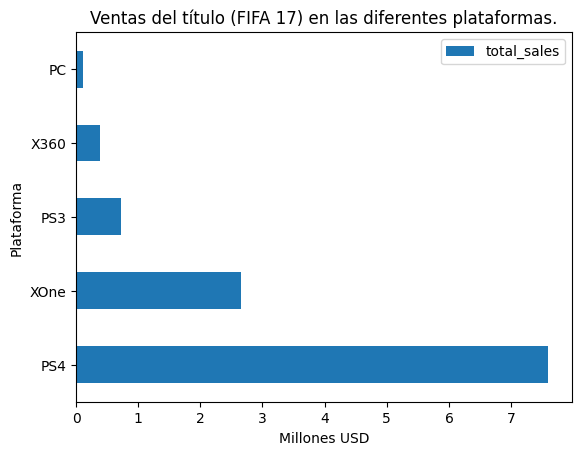

In [66]:
plt.figure(figsize=(20, 5))
fifa_17_i.plot(kind='barh', x='platform', y='total_sales', title='Ventas del título (FIFA 17) en las diferentes plataformas.', 
               xlabel='Millones USD', ylabel='Plataforma')

plt.show()

### 3.8 Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [67]:
genres_gpd = df_games_ii.groupby('genre')['total_sales'].sum().reset_index()

genres_gpd.sort_values(by='total_sales', ascending=False)

,genre,total_sales
0,Action,1716.52
10,Sports,1309.67
8,Shooter,1041.36
7,Role-Playing,931.08
4,Platform,825.55
3,Misc,790.29
6,Racing,723.49
2,Fighting,442.66
9,Simulation,387.96
5,Puzzle,239.89


## 4 Crea un perfil de usuario para cada región

### 4.1 Participacion de mercado por región.

In [68]:
# Determinando participación de mercado por plataforma por región.

tot_sales_na = df_games_ii[(df_games_ii['generation'] == '7G') | (df_games_ii['generation'] == '8G')]['na_sales'].sum()
tot_sales_eu = df_games_ii[(df_games_ii['generation'] == '7G') | (df_games_ii['generation'] == '8G')]['eu_sales'].sum()
tot_sales_jp = df_games_ii[(df_games_ii['generation'] == '7G') | (df_games_ii['generation'] == '8G')]['jp_sales'].sum()

na_sales = df_games_ii[(df_games_ii['generation'] == '7G') | (df_games_ii['generation'] == '8G')].groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
eu_sales = df_games_ii[(df_games_ii['generation'] == '7G') | (df_games_ii['generation'] == '8G')].groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
jp_sales = df_games_ii[(df_games_ii['generation'] == '7G') | (df_games_ii['generation'] == '8G')].groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()


na_sales['market_share'] = 100* (na_sales['na_sales'] / tot_sales_na)
eu_sales['market_share'] = 100* (eu_sales['eu_sales'] / tot_sales_eu)
jp_sales['market_share'] = 100* (jp_sales['jp_sales'] / tot_sales_jp)

jp_sales

,platform,jp_sales,market_share
0,DS,175.02,31.105819
1,3DS,100.62,17.882913
2,PS3,79.41,14.113319
3,PSP,75.88,13.485942
4,Wii,68.28,12.135215
5,PSV,21.84,3.881563
6,PS4,15.96,2.836526
7,WiiU,13.01,2.312231
8,X360,12.30,2.186045
9,XOne,0.34,0.060427


#### 4.1.1 Gráficas de participación de mercado por plataforma por región.

<Figure size 2000x500 with 0 Axes>

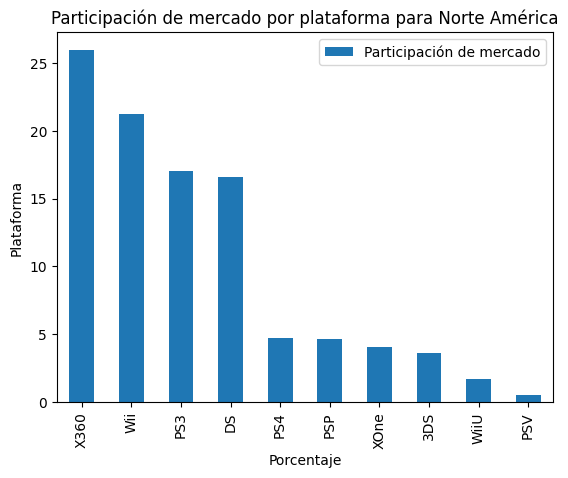

In [69]:
# Participación de mercado por plataforma NA

plt.figure(figsize=(20, 5))
na_sales.plot(kind='bar', x='platform', y='market_share', title='Participación de mercado por plataforma para Norte América', 
               xlabel='Porcentaje', ylabel='Plataforma')

plt.legend(['Participación de mercado'])
plt.show()

<Figure size 2000x500 with 0 Axes>

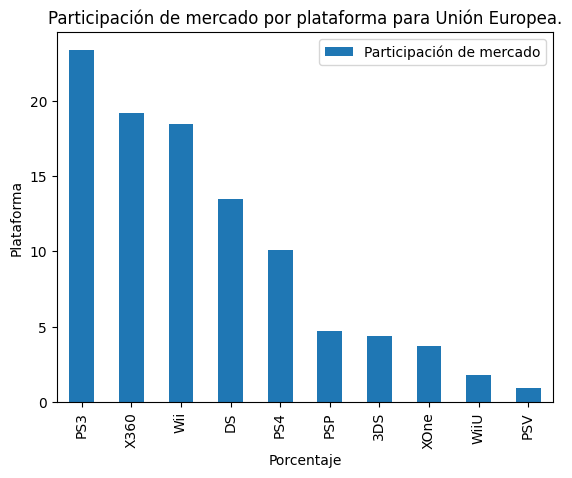

In [70]:
# Participación de mercado por plataforma EU

plt.figure(figsize=(20, 5))
eu_sales.plot(kind='bar', x='platform', y='market_share', title='Participación de mercado por plataforma para Unión Europea.', 
               xlabel='Porcentaje', ylabel='Plataforma')

plt.legend(['Participación de mercado'])
plt.show()

<Figure size 2000x500 with 0 Axes>

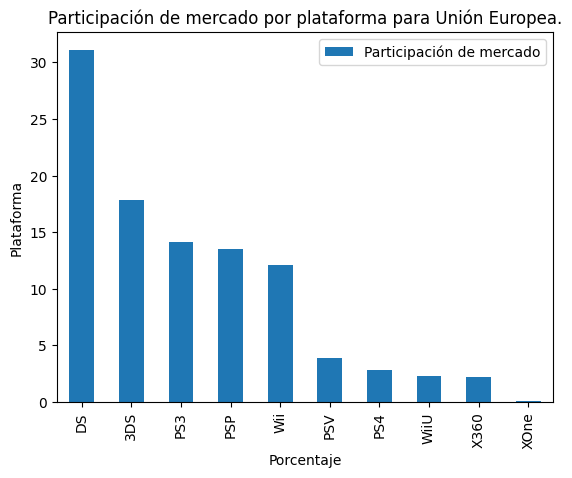

In [71]:
# Participación de mercado por plataforma Japón

plt.figure(figsize=(20, 5))
jp_sales.plot(kind='bar', x='platform', y='market_share', title='Participación de mercado por plataforma para Unión Europea.', 
               xlabel='Porcentaje', ylabel='Plataforma')

plt.legend(['Participación de mercado'])
plt.show()

In [72]:
df_games_ii.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,manufacturer,generation,year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Nintento,7G,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Nintento,2G,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Nintento,7G,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Nintento,7G,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Nintento,4G,1996


**Diferencias de participación de mercado por región.**

### 4.2 Los cinco géneros principales. Explica la diferencia

In [73]:
genres_na = df_games_ii.groupby(['genre'])['na_sales'].sum().reset_index()
genres_eu = df_games_ii.groupby(['genre'])['eu_sales'].sum().reset_index()
genres_jp = df_games_ii.groupby(['genre'])['jp_sales'].sum().reset_index()

genres_na_ord = genres_na.sort_values(by='na_sales',ascending=False)
genres_eu_ord = genres_eu.sort_values(by='eu_sales',ascending=False)
genres_jp_ord = genres_jp.sort_values(by='jp_sales',ascending=False)

#### 4.2.1 Gráficos de participación de mercado por genero.

**Es posible observar en las siguientes gráficas que los primeros tres generos con mas ventas para NA y UE son los mismos, mientras que para Japón el genero con mas ventas son los juegos de RP, teniendo una diferencia significativa con los demás generos de juegos.**

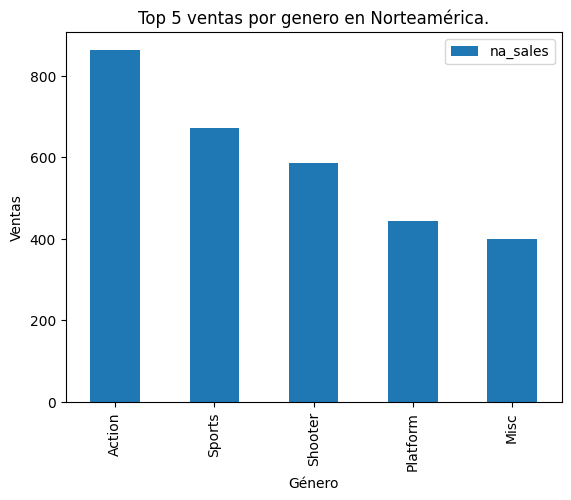

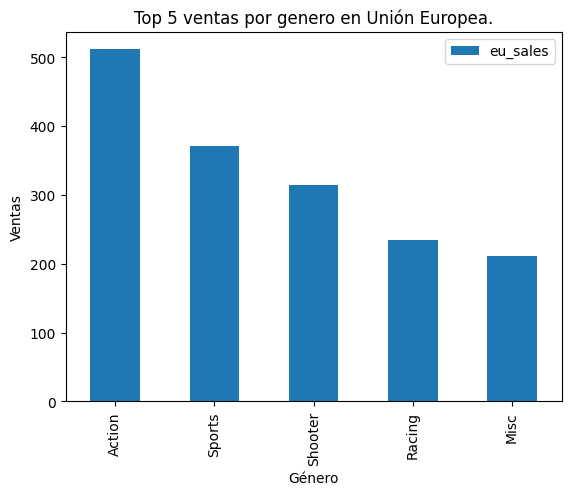

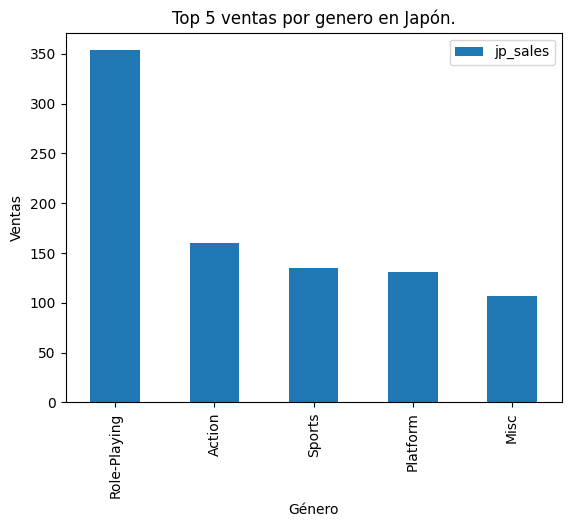

In [74]:
genres_na_ord.head(5).plot(kind='bar', x='genre', y='na_sales', xlabel='Género', ylabel='Ventas', 
                           title='Top 5 ventas por genero en Norteamérica.')

genres_eu_ord.head(5).plot(kind='bar', x='genre', y='eu_sales', xlabel='Género', ylabel='Ventas', 
                           title='Top 5 ventas por genero en Unión Europea.')

genres_jp_ord.head(5).plot(kind='bar', x='genre', y='jp_sales', xlabel='Género', ylabel='Ventas', 
                           title='Top 5 ventas por genero en Japón.')


plt.show()

### 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [75]:
rating_na = df_games_ii.groupby(['rating'])['na_sales'].sum().reset_index()
rating_eu = df_games_ii.groupby(['rating'])['eu_sales'].sum().reset_index()
rating_jp = df_games_ii.groupby(['rating'])['jp_sales'].sum().reset_index()

rating_na_ord = rating_na.sort_values(by='na_sales',ascending=False)
rating_eu_ord = rating_eu.sort_values(by='eu_sales',ascending=False)
rating_jp_ord = rating_jp.sort_values(by='jp_sales',ascending=False)

print(rating_na_ord)

print(rating_eu_ord)

print(rating_jp_ord)

  rating  na_sales
1      E   1274.24
7      T    747.60
5      M    742.89
2   E10+    345.50
4    K-A      2.56
3     EC      1.53
0     AO      1.26
6     RP      0.00
  rating  eu_sales
1      E    703.87
5      M    480.00
7      T    421.79
2   E10+    183.35
0     AO      0.61
4    K-A      0.27
3     EC      0.11
6     RP      0.03
  rating  jp_sales
1      E    197.96
7      T    150.70
5      M     63.58
2   E10+     40.20
4    K-A      1.46
0     AO      0.00
3     EC      0.00
6     RP      0.00


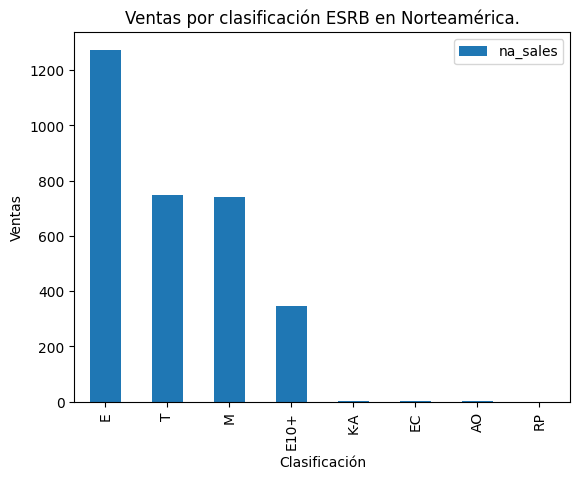

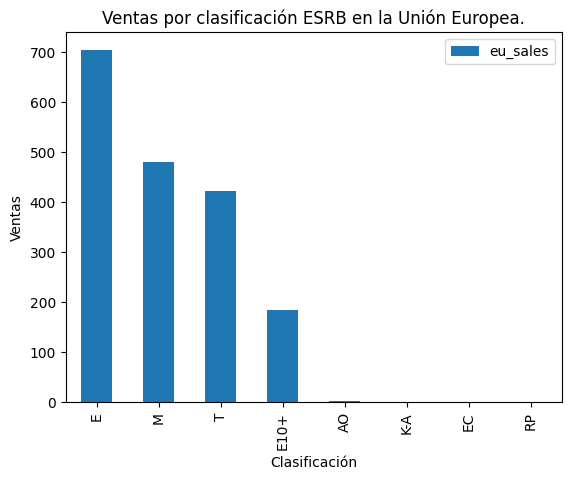

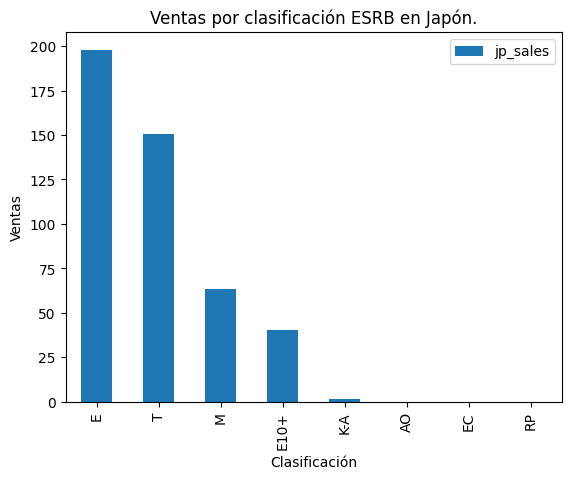

In [76]:
rating_na_ord.plot(kind='bar', x='rating', y='na_sales', xlabel='Clasificación', ylabel='Ventas', 
                           title='Ventas por clasificación ESRB en Norteamérica.')

rating_eu_ord.plot(kind='bar', x='rating', y='eu_sales', xlabel='Clasificación', ylabel='Ventas', 
                           title='Ventas por clasificación ESRB en la Unión Europea.')

rating_jp_ord.plot(kind='bar', x='rating', y='jp_sales', xlabel='Clasificación', ylabel='Ventas', 
                           title='Ventas por clasificación ESRB en Japón.')

plt.show()

## 5 Prueba las siguientes hipótesis.

### 5.1 Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Ho: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Ha: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.

Nivel significancia $\alpha = 0.05$

In [77]:
val_us_xone = df_games_ii[df_games_ii['platform'] == 'XOne']['user_score'].dropna()
val_us_pc = df_games_ii[df_games_ii['platform'] == 'PC']['user_score'].dropna()

In [78]:
# Determinando Ho , Ha

_, pvalue = ttest_ind(val_us_pc, val_us_xone, equal_var=True)
_, pvalue_lev = levene(val_us_pc, val_us_xone)


print(f'Valor p: {(pvalue)}')
print(f'Valor estadístico t: {pvalue_lev}')

Valor p: 1.3037979620149106e-05
Valor estadístico t: 0.2795532372785057


**Se puede observar que debido a que el valor P es mayor que el nivel de significancia establecido, concluyo que no se puede rechazar la Hipótesis Nula, por ende, las calificaciones de los usuarios para ambas plataformas si son iguales.**

### 5.2 Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Ho: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Ha: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

Nivel significancia $\alpha = 0.05$

In [79]:
gen_act = df_games_ii[df_games_ii['genre'] == 'Action']['user_score'].dropna()
gen_sports = df_games_ii[df_games_ii['genre'] == 'Sports']['user_score'].dropna()

In [80]:
# Determinando Ho , Ha

_, pvalue = ttest_ind(gen_act, gen_sports, equal_var=True)
_, pvalue_lev = levene(gen_act, gen_sports)


print(f'Valor p: {(pvalue)}')
print(f'Valor estadístico t: {pvalue_lev}')

Valor p: 0.06480928064420527
Valor estadístico t: 8.763985507235711e-05


**Se puede observar que debido a que la diferencia entre el valor P y el nivel de significancia establecido, concluyo que se debe aceptar la Hipótesis Nula, por ende, las calificaciones de los usuarios para los dos generos (Action, Sports) si son distintos.**

### 5.3 Explica.

-Cómo formulaste las hipótesis nula y alternativa.

**Ambas hipótesis nulas las proporcionan las instrucciones del proyecto, como consecuencia se deduce lo contrario para las hipótesis alternativas.**

-Qué criterio utilizaste para probar las hipótesis y por qué.

**En ambas hipótesis se solicita tomar como critério las puntuaciones que los usuarios le dan a los videojuegos para dos plataformas específicas (XOne y PC) y para dos generos (Action y Sports).**

## 6 Conclusiones Generales.

Como conclusiones generales del proyecto en cuanto a los datos se puede decir que el líder del mercado de los videojuegos ha estado dominado por las 2 empresas japonesas que son nintendo y Sony, en en el inicio de la industria nintendo tenía el dominio de las ventas; Sin embargo, esto ha cambiado con el pasar de los años, ya que, se puede observar que Sony ha tomado el dominio de las plataformas de los videojuegos, Esto se puede deber a los avances tecnológicos que esta empresa japonesa ha desarrollado. 

Por otra parte la incursión de Microsoft en la industria de los videojuegos también ha marcado un antes y un después en la venta de los plataformas de juegos, iniciando así una competencia feroz por dominar el mercado. En cuanto al dominio del mercado en las diferentes zonas geográficas como Japón, la unión europea y Norteamérica, es posible ver que los consumidores cuentan con cierta lealtad para comprar consolas, que son de su mismo origen, es decir, los consumidores de Japón prefieren comprar juegos a nintendo o o Sony, hay por otro lado, Microsoft domina el mercado estadounidense. 

Cómo conclusión personal puedo decir que me pareció muy interesante el proyecto y que puse en práctica todo lo que he aprendido en este bootcamp. 
